<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/11_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: heatmap

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
cars = sns.load_dataset('mpg')

In [ ]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
from sklearn.preprocessing import LabelEncoder
cars['origin'] = LabelEncoder().fit_transform(cars['origin'])
cars['name'] = LabelEncoder().fit_transform(cars['name'])

## Intro Visuals

In [ ]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [ ]:
xlabels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
ylabels = ['Coffee', 'Juice', 'Soda', 'Tea']

orders = np.array([[44, 31, 50, 41, 30],
                   [21, 12, 28, 38, 35],
                   [15, 18, 20, 14, 12],
                   [38, 29, 39, 26, 11]]
                 )

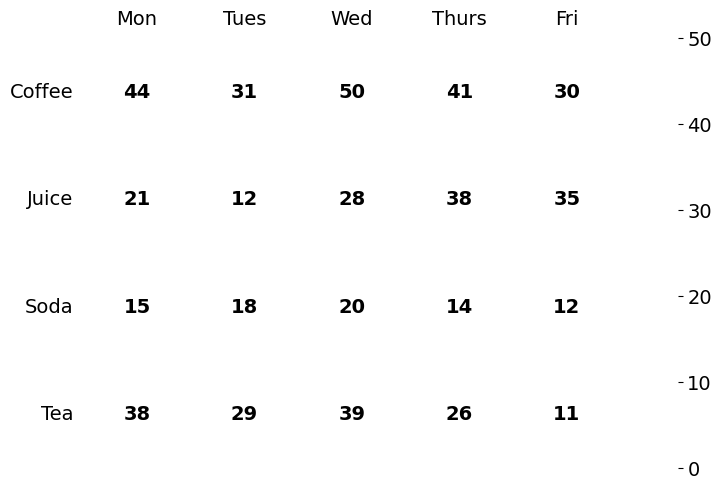

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(orders,
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            alpha=0,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labeltop=True)
plt.tight_layout()

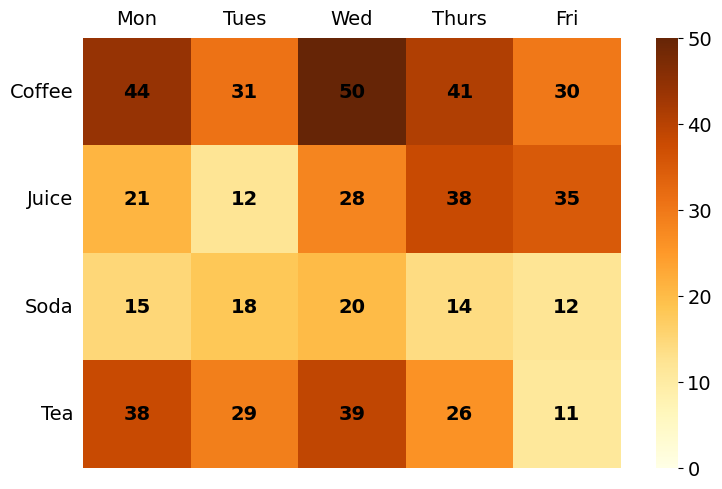

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(orders,
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labeltop=True)
plt.tight_layout()

#### Color Palette Overlay

In [ ]:
origin_cyl_arr = np.array([[  0.,  63.,   3.,   4.,   0.],
                           [  4.,  69.,   0.,   6.,   0.],
                           [  0.,  72.,   0.,  74., 103.]])

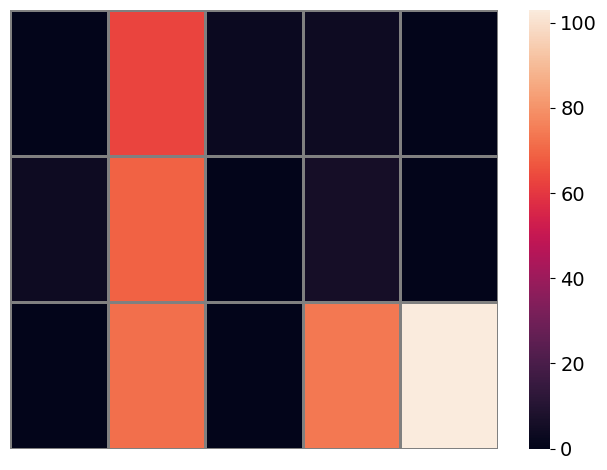

In [ ]:
sns.heatmap(origin_cyl_arr,
            xticklabels=[],
            yticklabels=[],
            cmap='rocket',
            linewidth=1,
            linecolor='gray'
           )
plt.tight_layout()

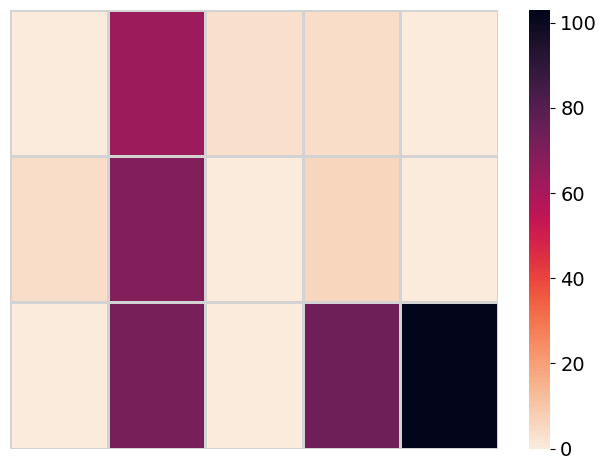

In [ ]:
sns.heatmap(origin_cyl_arr,
            xticklabels=[],
            yticklabels=[],
            cmap='rocket_r',
            linewidth=1,
            linecolor='lightgray'
           )
plt.tight_layout()

#### Annotation Overlay

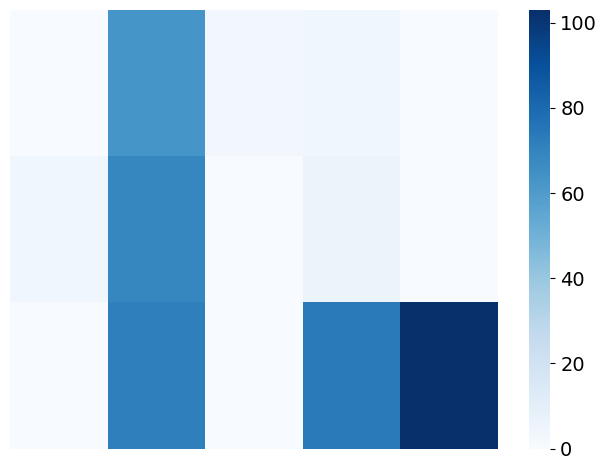

In [ ]:
sns.heatmap(origin_cyl_arr,
            xticklabels=[],
            yticklabels=[],
            cmap='Blues'
           )
plt.tight_layout()

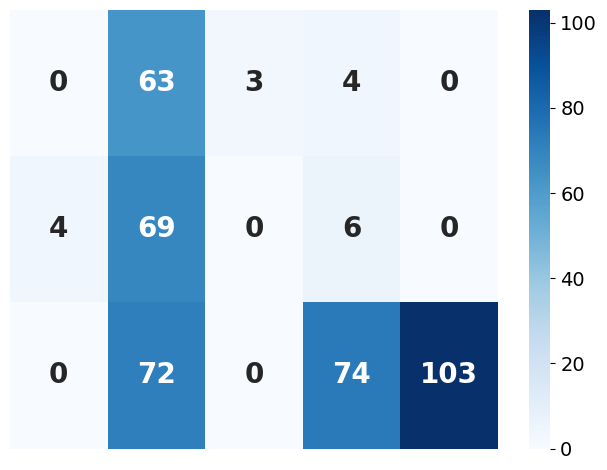

In [ ]:
sns.heatmap(origin_cyl_arr,
            xticklabels=[],
            yticklabels=[],
            cmap='Blues',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize':20, 'fontweight': 'bold'}
           )
plt.tight_layout()
plt.savefig('11heatmap_example_withannot.svg')

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

In [ ]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
0       4             63
        6              4
        5              3
1       4             69
        6              6
        3              4
2       8            103
        6             74
        4             72
Name: count, dtype: int64

In [ ]:
(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders,3,4,5,6,8
origin,,,,,
0,0.0,63.0,3.0,4.0,0.0
1,4.0,69.0,0.0,6.0,0.0
2,0.0,72.0,0.0,74.0,103.0


In [ ]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0)
)

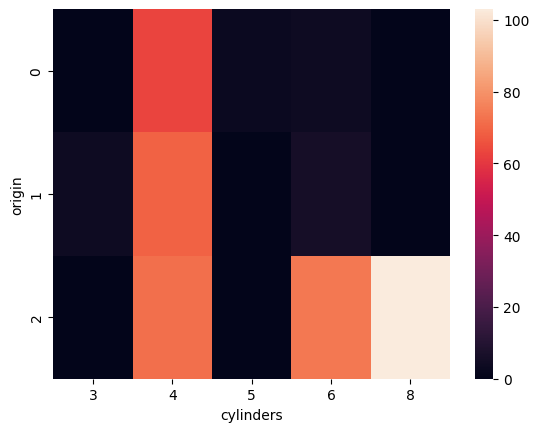

In [ ]:
sns.heatmap(origin_cyl)

### Arrays

In [ ]:
test_array = np.array([[1, 2], [3, 4]])

test_array

array([[1, 2],
       [3, 4]])

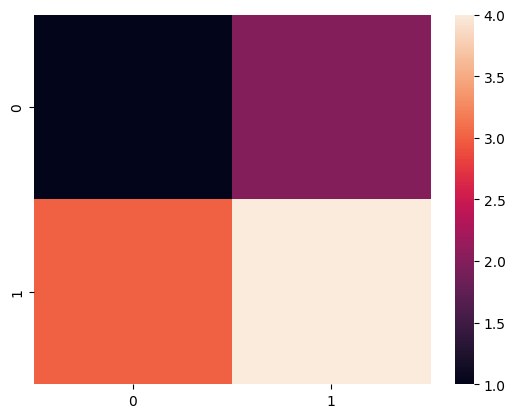

In [ ]:
sns.heatmap(test_array)

### Transpose

In [ ]:
origin_cyl.T

origin,0,1,2
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


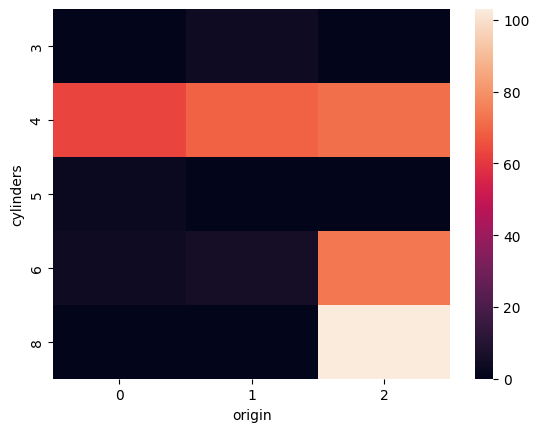

In [ ]:
sns.heatmap(origin_cyl.T)

### Correlation

In [ ]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,-0.482619,0.273936
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,0.551378,-0.275754
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.591137,-0.292064
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.447330,-0.234663
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.521088,-0.255247
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,-0.257365,0.128285
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,-0.075409,0.074761
origin,-0.482619,0.551378,0.591137,0.447330,0.521088,-0.257365,-0.075409,1.000000,-0.437807
name,0.273936,-0.275754,-0.292064,-0.234663,-0.255247,0.128285,0.074761,-0.437807,1.000000


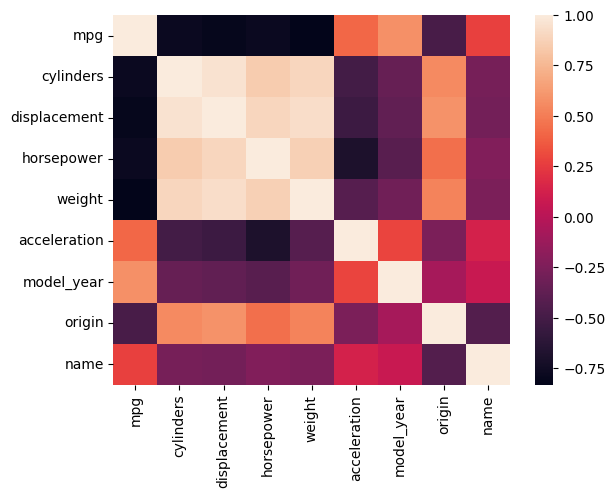

In [ ]:
sns.heatmap(cars.corr())

## Color Palette

Seaborn offers 170 different color palette options.  Check out this great [post](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) to view them all.

We'll start with a SEQUENTIAL palette.

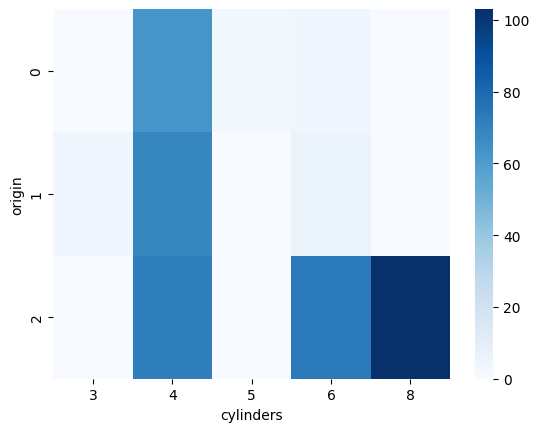

In [ ]:
sns.heatmap(origin_cyl, cmap="Blues")

Now let's try a DIVERGING palette.

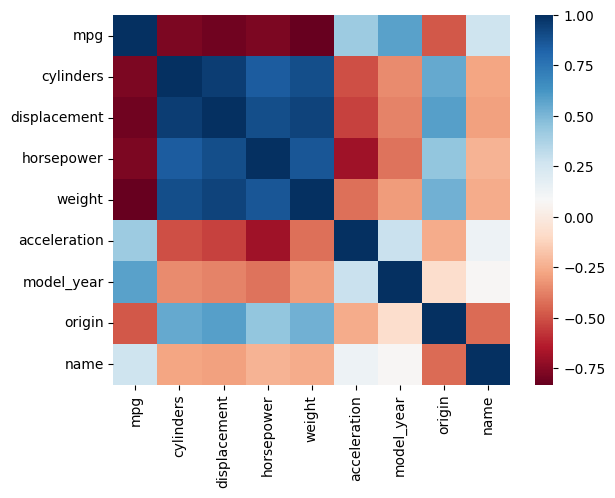

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu')

### Controling the Colorbar Range: center, vmax, vmin

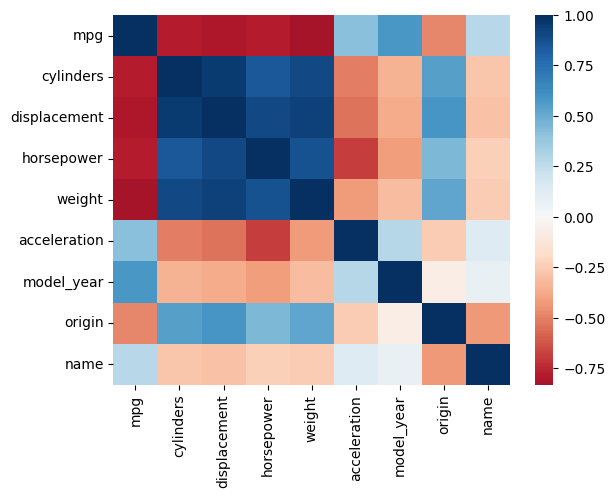

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu', center=0)

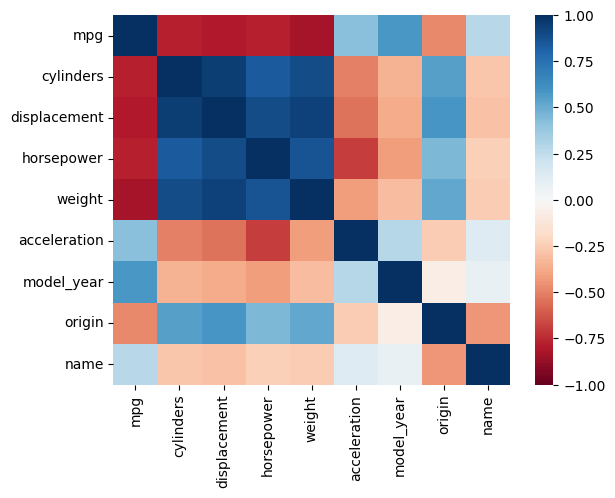

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1)

## Annotations

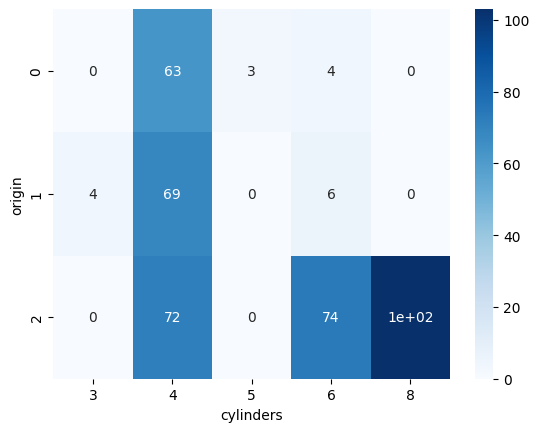

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True)

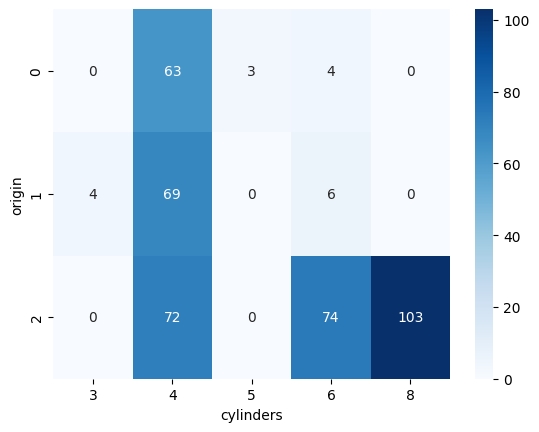

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt=".0f")  #fmt=".1f" for one decimal place

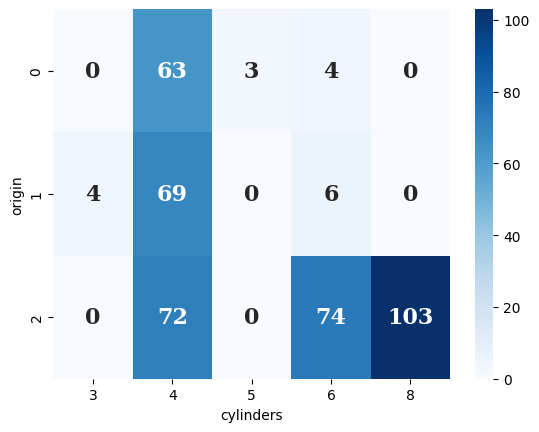

In [ ]:
sns.heatmap(origin_cyl,
            cmap='Blues',
            annot=True,
            fmt=".0f",
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif',
               # 'color': 'black'
            }
           )

## Styling

### linewidth

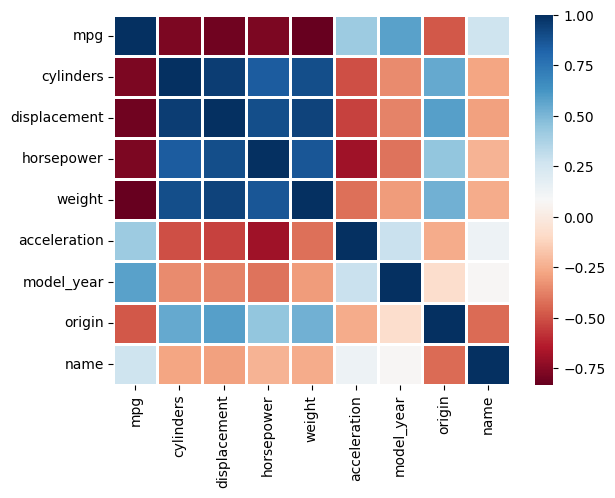

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1)

### linecolor

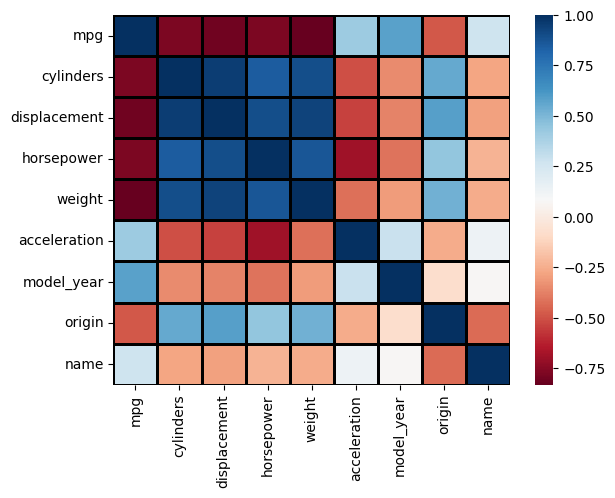

In [ ]:
sns.heatmap(cars.corr(),
            cmap='RdBu',
            linewidth=1,
            linecolor='black'
           )

### Tick Labels

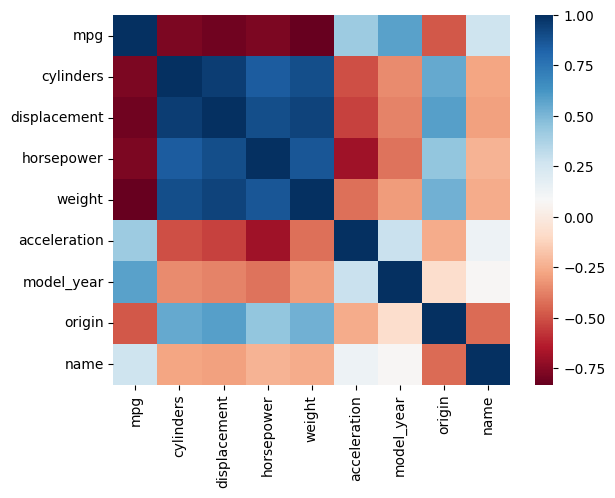

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu')

In [ ]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year'
         ]

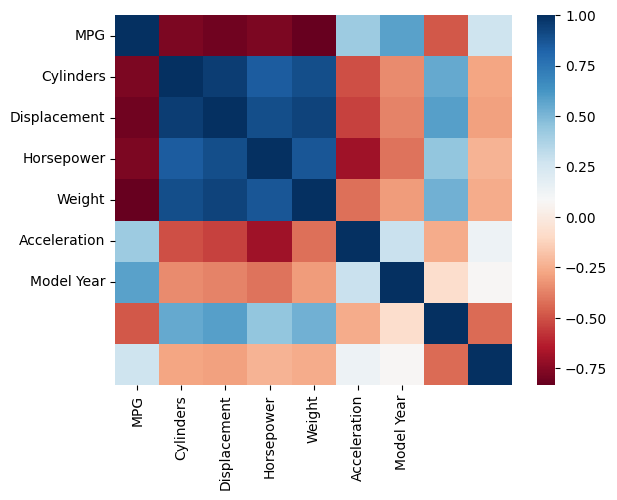

In [ ]:
sns.heatmap(cars.corr(),
            cmap='RdBu',
            xticklabels=labels,
            yticklabels=labels
           )

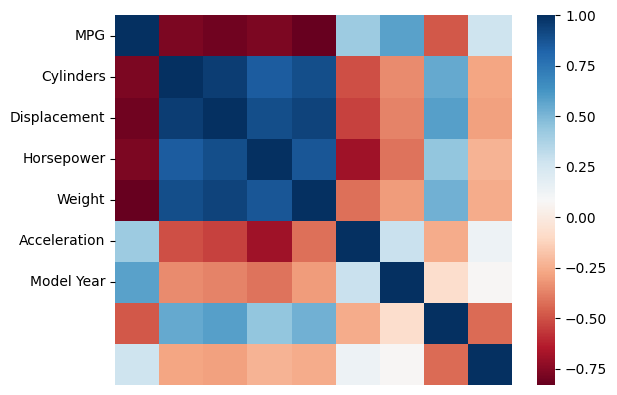

In [ ]:
sns.heatmap(cars.corr(),
            cmap='RdBu',
            xticklabels=False,
            yticklabels=labels
           )

### square

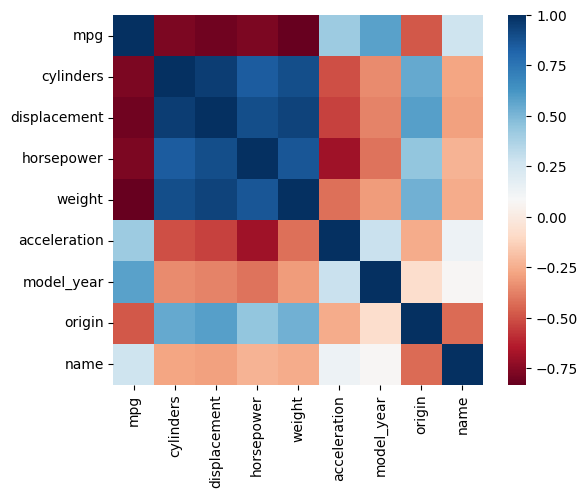

In [ ]:
sns.heatmap(cars.corr(),
            cmap='RdBu',
            square=True
           )